<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
image = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/lena.jpg')

# Memisahkan channel warna
red_channel = image[:, :, 2]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 0]

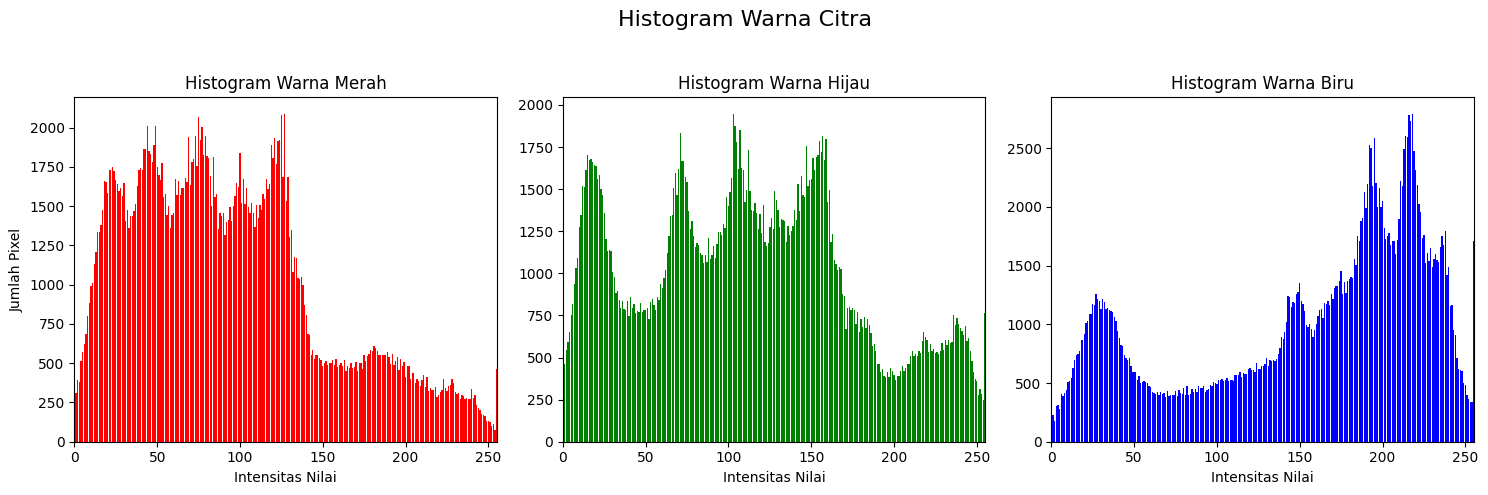

In [42]:
# Mengubah citra ke format RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Memisahkan channel warna
red_channel = image[:, :, 2]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 0]

# Menghitung histogram untuk masing-masing channel
red_hist, bins_red = np.histogram(red_channel, bins=256, range=[0, 256])
green_hist, bins_green = np.histogram(green_channel, bins=256, range=[0, 256])
blue_hist, bins_blue = np.histogram(blue_channel, bins=256, range=[0, 256])

# Membuat plot histogram dengan gaya yang diinginkan
plt.figure(figsize=(15, 5))

# Histogram Red
plt.subplot(1, 3, 1)
plt.bar(range(256), red_hist, color='red')
plt.title('Histogram Warna Merah')
plt.xlabel('Intensitas Nilai')
plt.ylabel('Jumlah Pixel')
plt.xlim([0, 255])

# Histogram Green
plt.subplot(1, 3, 2)
plt.bar(range(256), green_hist, color='green')
plt.title('Histogram Warna Hijau')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Histogram Blue
plt.subplot(1, 3, 3)
plt.bar(range(256), blue_hist, color='blue')
plt.title('Histogram Warna Biru')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Menambahkan judul utama
plt.suptitle('Histogram Warna Citra', fontsize=16)

# Menampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<ipython-input-45-ed2e3cb96ce0>:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 1)
<ipython-input-45-ed2e3cb96ce0>:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 2)
<ipython-input-45-ed2e3cb96ce0>:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 3)


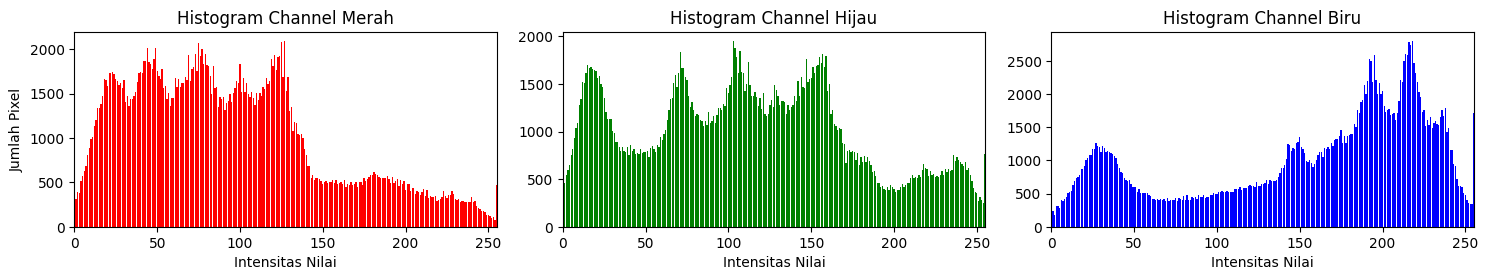

In [45]:
# Menghitung histogram untuk masing-masing channel menggunakan cv2.calcHist
red_hist = cv.calcHist([red_channel], [0], None, [256], [0, 256])
green_hist = cv.calcHist([green_channel], [0], None, [256], [0, 256])
blue_hist = cv.calcHist([blue_channel], [0], None, [256], [0, 256])

# Mengubah histogram ke format yang bisa ditampilkan dengan bar
red_hist = red_hist.flatten()
green_hist = green_hist.flatten()
blue_hist = blue_hist.flatten()

# Membuat plot histogram sebagai bar histogram
plt.figure(figsize=(15, 5))

# Histogram Red
plt.subplot(1, 3, 1)
plt.bar(range(256), red_hist, color='red')
plt.title('Histogram Warna Merah')
plt.xlabel('Intensitas Nilai')
plt.ylabel('Jumlah Pixel')
plt.xlim([0, 255])

# Histogram Green
plt.subplot(1, 3, 2)
plt.bar(range(256), green_hist, color='green')
plt.title('Histogram Warna Hijau')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Histogram Blue
plt.subplot(1, 3, 3)
plt.bar(range(256), blue_hist, color='blue')
plt.title('Histogram Warna Biru')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Histogram Merah
plt.subplot(2, 3, 1)
plt.bar(range(256), red_hist, color='red')
plt.title('Histogram Channel Merah')
plt.xlabel('Intensitas Nilai')
plt.ylabel('Jumlah Pixel')
plt.xlim([0, 255])

# Histogram Hijau
plt.subplot(2, 3, 2)
plt.bar(range(256), green_hist, color='green')
plt.title('Histogram Channel Hijau')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Histogram Biru
plt.subplot(2, 3, 3)
plt.bar(range(256), blue_hist, color='blue')
plt.title('Histogram Channel Biru')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Menampilkan plot
plt.tight_layout()
plt.show()